In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Load kết quả baseline

In [3]:
df_results = pd.read_csv("../results/tables/baseline_results.csv")
figures_dir = "../results/figures/baseline"

# Vẽ từng biểu đồ

1️⃣ So sánh trực tiếp giữa Baseline và GridSearchCV trên 4 tiêu chí

C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_10568\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_10568\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_10568\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_10568\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

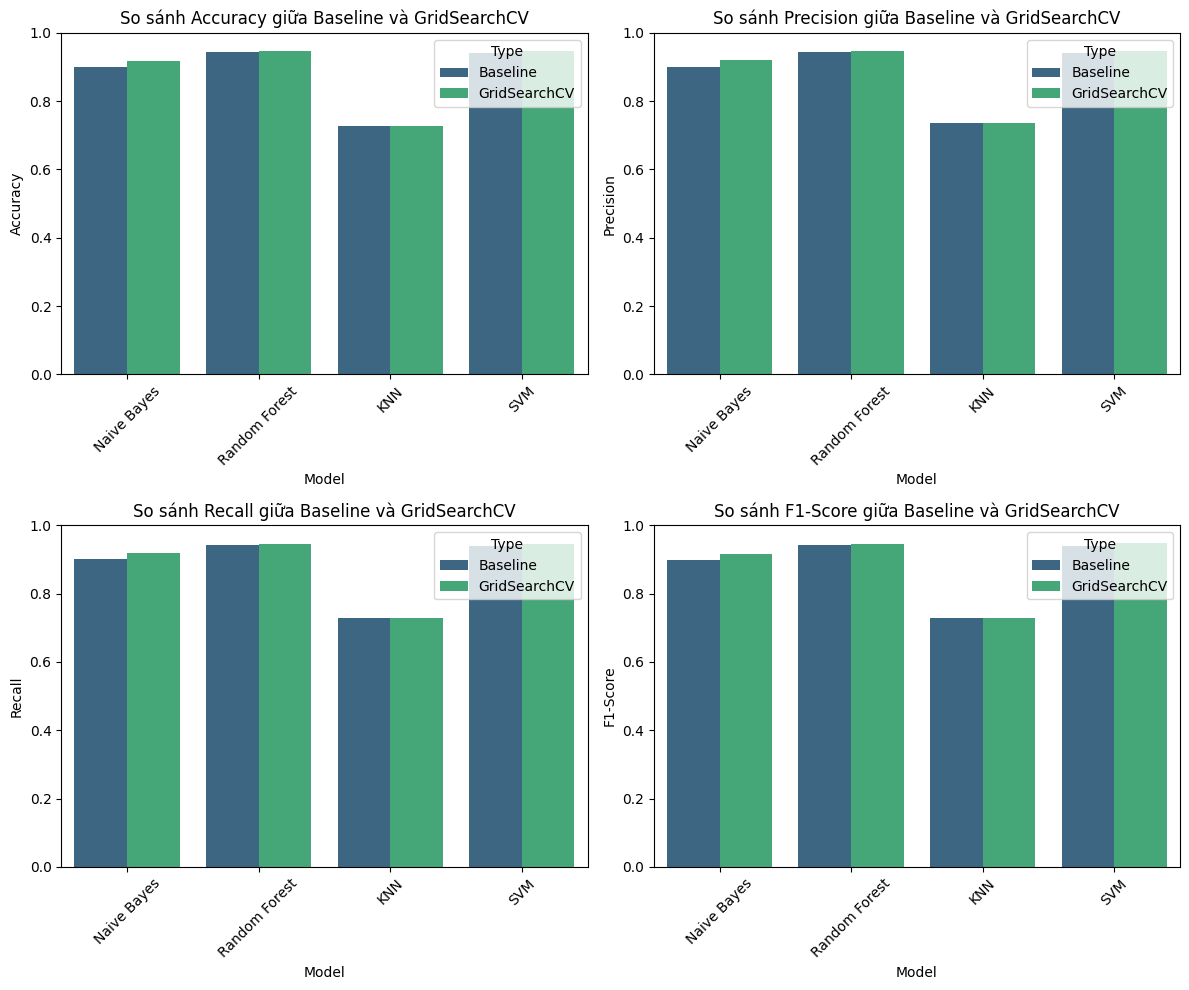

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    sns.barplot(data=df_results, x="Model", y=metric, hue="Type", ax=ax, palette="viridis")
    ax.set_title(f"So sánh {metric} giữa Baseline và GridSearchCV")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(0, 1)

fig.tight_layout()
fig.savefig(os.path.join(figures_dir, "comparison_metrics.png"))
plt.show()

In [ ]:
# Chuyển dữ liệu về dạng pivot table để dễ tính toán
df_pivot = df_results.pivot_table(index="Model", columns="Type", values=["Accuracy", "Precision", "Recall", "F1-Score"])

# Tính Improvement (%) đơn giản hơn
df_improvement = (df_pivot.xs("GridSearchCV", axis=1, level=1) - df_pivot.xs("Baseline", axis=1, level=1)) * 100

# Reset index để thuận tiện vẽ biểu đồ
df_improvement = df_improvement.reset_index().melt(id_vars="Model", var_name="Metric", value_name="Improvement (%)")

# Xác định giới hạn tối đa của Improvement (%)
max_improvement = df_improvement["Improvement (%)"].max()
y_limit_max = max_improvement * 1.1 

C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_10568\264562412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


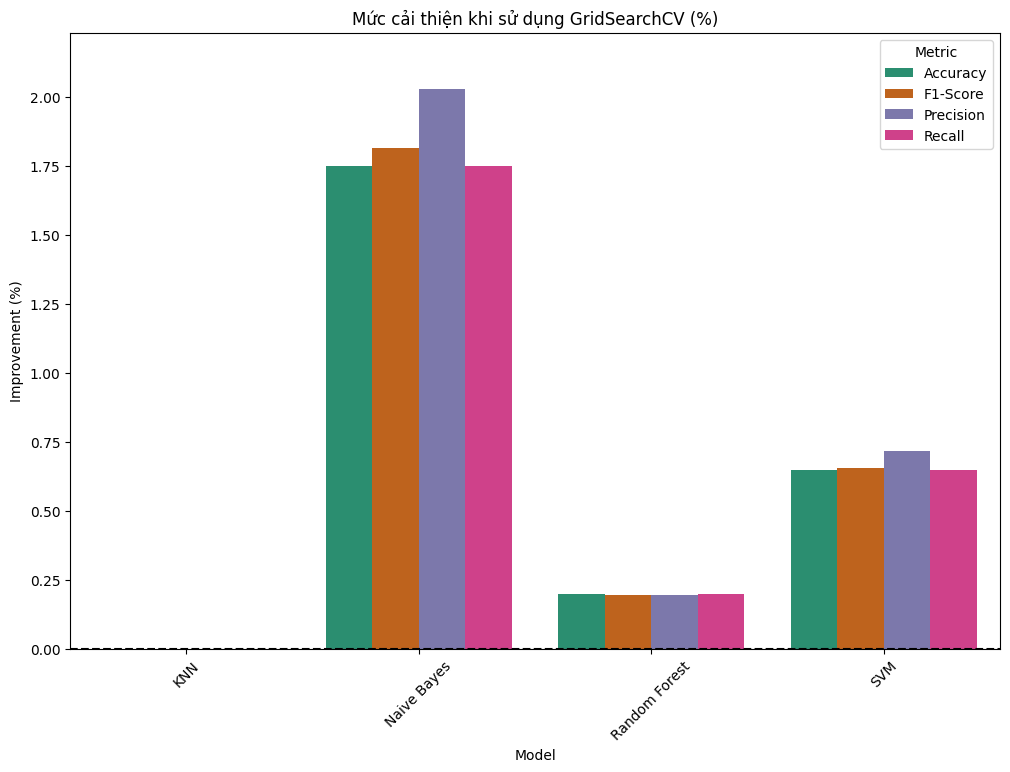

In [8]:
# Vẽ biểu đồ mức cải thiện
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_improvement, x="Model", y="Improvement (%)", hue="Metric", palette="Dark2", ax=ax)
ax.set_title("Mức cải thiện khi sử dụng GridSearchCV (%)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.axhline(0, color="black", linestyle="--")
ax.set_ylim(0, y_limit_max)  # Giới hạn y theo max_improvement

# Lưu hình ảnh
plt.savefig(os.path.join(figures_dir, "improvement.png"))
plt.show()